# Goeduhub Technologies - ML Training - Task 14
## Registration ID: GO_STP_939 
## Name: Manoj Kannan D
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#  Assignment-14: K-Nearest Neighbor(KNN)
#### We have a dataset that contains multiple user's information through the social network who are interested in buying SUV Car or not. 

# Load Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Datasets/User_Data.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# Unwanted feauture - 'User ID'
df.drop('User ID',axis = 1, inplace=True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


# Explore Data

In [4]:
# dimensions of the dataset
df.ndim

2

In [5]:
df.shape

(400, 4)

In [6]:
# size of the dataset (total umber of elements)
df.size

1600

In [7]:
# columns present in our dataset
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [8]:
# Print a concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [9]:
# provides statistical analysis only in numerrical columns
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [10]:
# check for null elements
df.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [11]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [12]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [13]:
#Average numbers for all columns
df.groupby('Purchased').mean()

,Age,EstimatedSalary
Purchased,,
0,32.793774,60544.747082
1,46.391608,86272.727273


# Data Visualization

In [14]:
def category_plot(var):
    fig = plt.figure(figsize=(14,4))
    fig.suptitle('Count of '+var ,fontsize=14)
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    ax1.pie(df[var].value_counts(), labels=df[var].unique(), autopct='%.0f%%', explode=[0.03]*df[var].nunique())
    ax2.bar(df[var].unique(),df[var].value_counts())

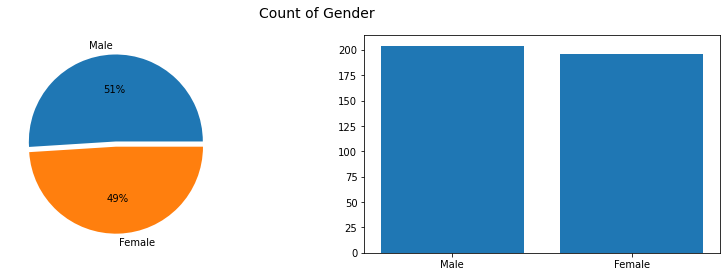

In [15]:
category_plot('Gender')

In [16]:
def numerical_plot(var):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.histplot(x=df[var], kde=True, bins=10)
    plt.subplot(1,2,2)
    sns.barplot(x=df['Purchased'], y=df[var])
    plt.suptitle(var,fontsize=14)

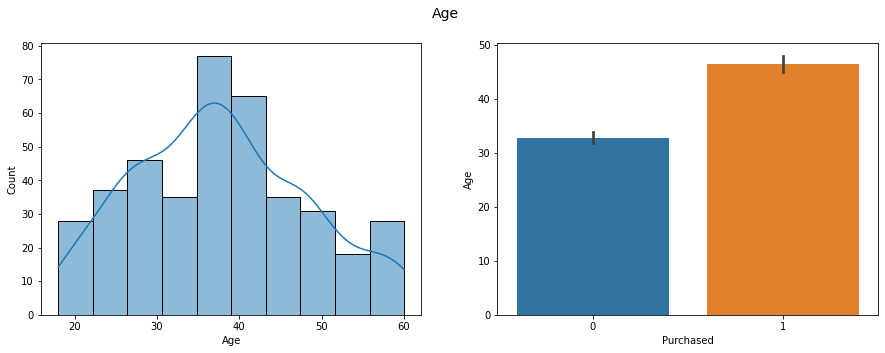

In [17]:
numerical_plot('Age')

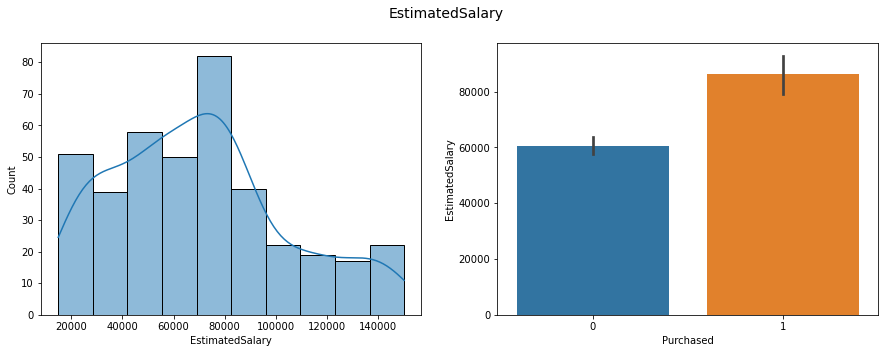

In [18]:
numerical_plot('EstimatedSalary')

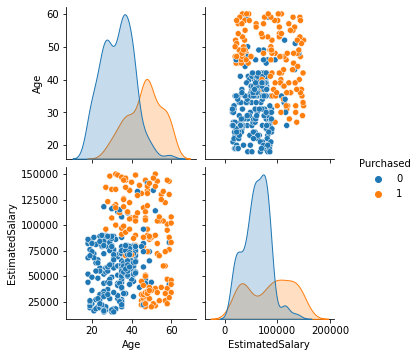

In [19]:
sns.pairplot(df,hue='Purchased')
plt.show()

## Correlation Matrix

Text(0.5, 1.0, 'Correlation')

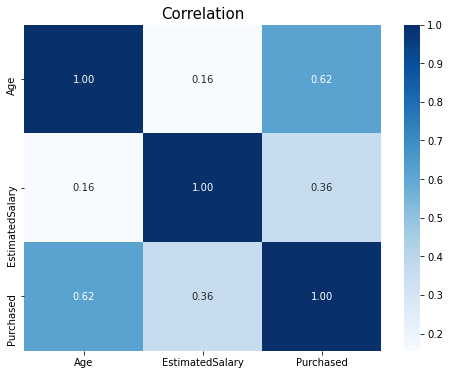

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='Blues', fmt='.2f', annot = True)
plt.title('Correlation',fontsize=15)

# ML Model
## Data PreProcessing

In [22]:
# Label Encode 'Gender' Feature
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
df['Gender'] = le.fit_transform(df['Gender'])

In [24]:
le.classes_

array(['Female', 'Male'], dtype=object)

## Data Split

In [26]:
X = df.drop('Purchased',axis=1)
y = df['Purchased']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [28]:
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (320, 3)
y_train: (320,)
X_test: (80, 3)
y_test: (80,)


## KNN Model

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [30]:
# model training
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train,y_train)
knn_model

KNeighborsClassifier()

In [31]:
# model prediction
knn_predict = knn_model.predict(X_test)

In [32]:
print('Training accuracy:',knn_model.score(X_train,y_train))
print('Testing accuracy:',knn_model.score(X_test,y_test))

Training accuracy: 0.8625
Testing accuracy: 0.85


## Experimenting with different n_neighbours values

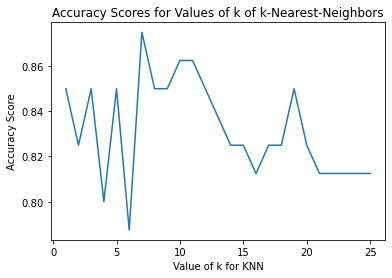

In [33]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

## Thus, KNN Model with K=7 has Good Accuaracy.

# Retrain model with best n_neighbour value

In [34]:
# model training
knn_model = KNeighborsClassifier(n_neighbors = 7)
knn_model.fit(X_train,y_train)

# model prediction
knn_predict = knn_model.predict(X_test)

# accuracy
print('Training accuracy:',knn_model.score(X_train,y_train))
print('Testing accuracy:',knn_model.score(X_test,y_test))

Training accuracy: 0.84375
Testing accuracy: 0.875


## Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, knn_predict)
cm

array([[48,  4],
       [ 6, 22]], dtype=int64)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

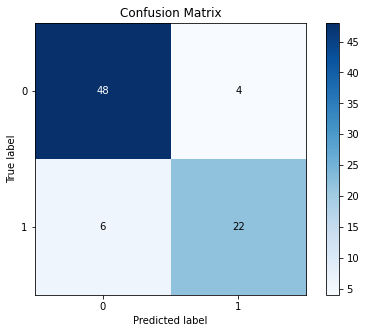

In [36]:
import scikitplot 
scikitplot.metrics.plot_confusion_matrix(y_test, knn_predict, figsize=(7,5))

In [37]:
# Evaluation Metrics
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, knn_predict))
print("Precision:",metrics.precision_score(y_test, knn_predict))
print("Recall:",metrics.recall_score(y_test, knn_predict))
print("F1 Score:",metrics.f1_score(y_test, knn_predict))

Accuracy: 0.875
Precision: 0.8461538461538461
Recall: 0.7857142857142857
F1 Score: 0.8148148148148148


## ROC Curve

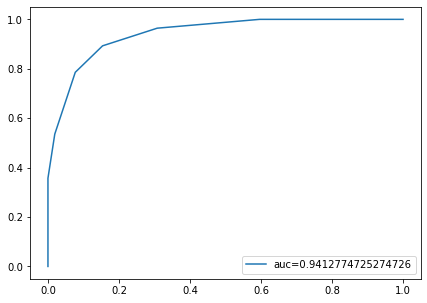

In [38]:
plt.figure(figsize=(7,5))
y_pred_proba = knn_model.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
# (or) auc = metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

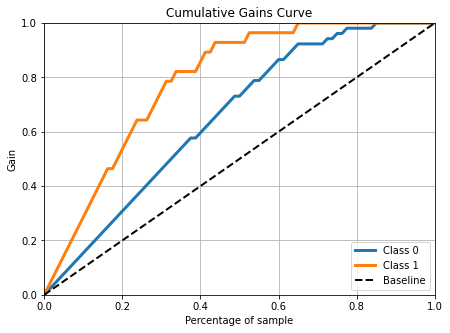

In [39]:
scikitplot.metrics.plot_cumulative_gain(y_test, knn_model.predict_proba(X_test) ,figsize=(7,5))
plt.show()